In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
X, y = boston.data, boston.target

In [10]:
X.shape

(506, 13)

In [12]:
y.shape

(506,)

### 1. Create train and test sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, train_size=0.8)

In [15]:
X_train.shape

(404, 13)

In [16]:
X_test.shape

(102, 13)

In [17]:
X_train[0,:]

array([3.5100e-02, 9.5000e+01, 2.6800e+00, 0.0000e+00, 4.1610e-01,
       7.8530e+00, 3.3200e+01, 5.1180e+00, 4.0000e+00, 2.2400e+02,
       1.4700e+01, 3.9278e+02, 3.8100e+00])

#### Sanity check: Could a linear model make sense?

Text(0, 0.5, 'Prices per square meter')

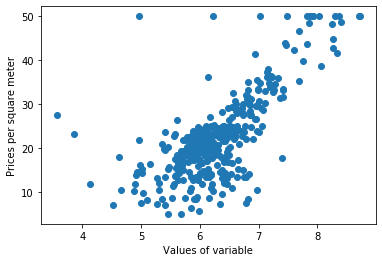

In [37]:
plt.scatter(X_train[:,5], y_train)
plt.xlabel('Values of variable')
plt.ylabel('Prices per square meter')

### 2. Train a model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

We need to pass some data to `lr` to calculate the relationship.

In [20]:
lr.fit(X_train, y_train) # Find the coefficients in linear regression 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

You can look at how the predictions will be calculated *in this case*.

In [21]:
lr.coef_ # Coefficients/weights from lina

array([-9.87931696e-02,  4.75027102e-02,  6.69491841e-02,  1.26954150e+00,
       -1.54697747e+01,  4.31968412e+00, -9.80167937e-04, -1.36597953e+00,
        2.84521838e-01, -1.27533606e-02, -9.13487599e-01,  7.22553507e-03,
       -5.43790245e-01])

In [22]:
X_train[0,:]

array([3.5100e-02, 9.5000e+01, 2.6800e+00, 0.0000e+00, 4.1610e-01,
       7.8530e+00, 3.3200e+01, 5.1180e+00, 4.0000e+00, 2.2400e+02,
       1.4700e+01, 3.9278e+02, 3.8100e+00])

In [23]:
lr.intercept_

31.835164121206386

In [25]:
lr.score(X_train, y_train)  # Accuracy of the model in the training set. (between 0 and 1)

0.7559380876016175

#### Look at what the model does in the testing set (validation).

In [26]:
y_pred = lr.predict(X_test)

In [29]:
y_pred[:5]

array([16.00330023, 27.79447431, 39.26769478, 18.32613556, 30.45487494])

In [30]:
y_test[:5]

array([15. , 26.6, 45.4, 20.8, 34.9])

**Parity plot:** Compare predicted values against observed values.

In [38]:
minval = min(min(y_pred), min(y_test))
maxval = max(max(y_pred), max(y_test))

In [39]:
import numpy as np

In [41]:
mesh = np.linspace(minval, maxval, 100) # 100 equally spaced points in (minval, maxval)

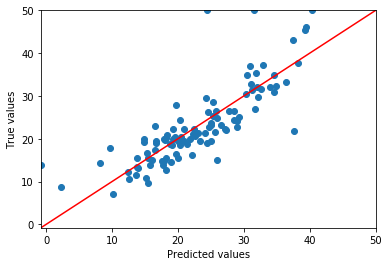

In [42]:
# Parity plot
plt.scatter(y_pred, y_test)
plt.xlim(minval, maxval)
plt.ylim(minval, maxval)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.plot(mesh, mesh, 'r') #draw a red line at 45 degrees